# Decision Trees

Decision trees are an effective and popular classification (and regression) method initially developed by Leo Breiman and others in 1984.

A tree model is a set of “if-then-else” rules that are easy to understand and to implement.  In  contrast  to  regression  and  logistic  regression,  trees  have  the  ability  to  discover  hidden  patterns  corresponding  to  complex  interactions  in  the  data.  However, unlike KNN or naive Bayes, simple tree models can be expressed in terms of predictor relationships that are easily interpretable.

# Setup

Create a "images" folder and a "decision_trees" inside fisrt. 
- The images created in this notebook will be added to the folder you created.
- The dot files will also be added in the same folder.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width #only two so can do 2-d plot
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # Remove the CWD from sys.path while we load stuff.


Saving figure decision_tree_decision_boundaries_plot


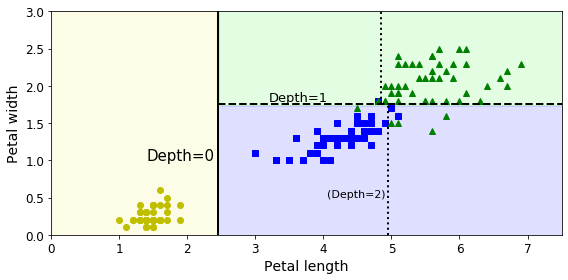

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

Smaller Gini=better 

depth=0 first decision boundary<br>
> 100% pure node <br>
Once a new sample, if you get a sample here, then you get this label (50,0,0) so 100% pure node


Depth 1= second decision<br>
> Petal Width<br>
>Gini 
> > further decision dotted line if I wanted to go further

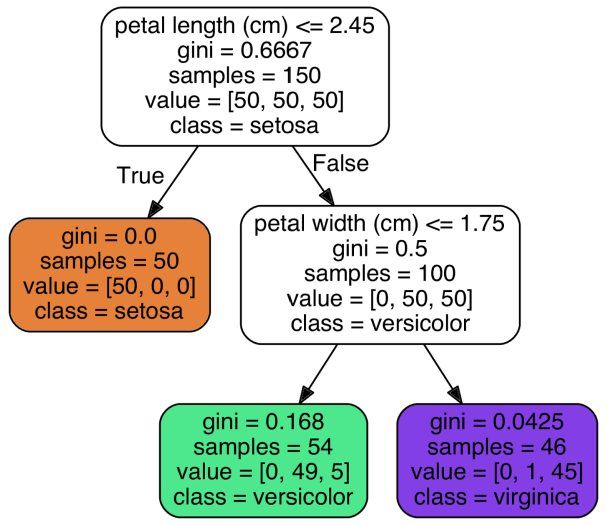

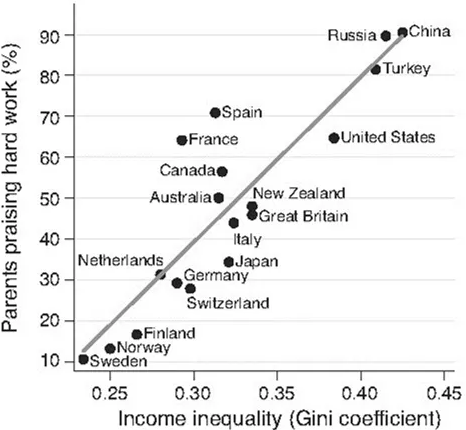

High Gini index= wealth distribution is not equal 

Is high Gini bad? Yes. <br>
Is low Gini good? Discuss later.

Y axis: hard work praised. 


### Gini impurity
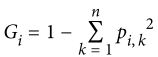
•  P i,k  is the ratio of class k instances among the training instances in the i th  node.

For the green node, the Gini impurity value is: 1 – (0/54)^2  – (49/54)^2  – (5/54)^2  ≈ 0.168

### Exercise:
1) Calculate the Gini impurity vlaues for the orange node and the white node on the 2nd level (depth 1).

2) What is the Gini impurity of the root node?

3) What are the highest and lowest Gini impurity values possible? How can we get them?


In [11]:
#1) Calculate the Gini impurity vlaues for the orange node and the white node on the 2nd level (depth 1).
giniwhite = 1 - (0/100)**2 - (50/100)**2 - (50/100)**2
print('gini impurity White Node on 2nd level:', giniwhite)

giniorange= 1 - (50/50)**2 - (0/50)**2 - (0/50)**2
print('gini impurity Orange Node on 2nd level:', giniorange)

gini impurity White Node on 2nd level: 0.5
gini impurity Orange Node on 2nd level: 0.0


In [12]:
#2) What is the Gini impurity of the root node?

giniroot =1 - (50/150)**2 - (50/150)**2 - (50/150)**2
print('gini impurity Root:', giniroot)

gini impurity Root: 0.6666666666666665


In [ ]:
#3) What are the highest and lowest Gini impurity values possible? How can we get them?
    #highest gini possible is equal distribution amoung the number of groups 
    #(with higher number of classes resulting in higher gini) - closer and closer to one
    
    #lowest would be 0: where all observations in correct classificaiton

## Class Probabilities

A Decision Tree can also estimate the probability that an instance belongs to a particular class k: first it traverses the tree to find the leaf node for this instance, and then it returns  the  ratio  of  training  instances  of  class  k  in  this  node.  

In [13]:
tree_clf.predict_proba([[5, 1.5]]) #petal length 5, petal width 1.5
                                    #0% class one, 91% class two, 10% class three 

array([[0.        , 0.90740741, 0.09259259]])

In [14]:
tree_clf.classes_

array([0, 1, 2])

### The CART Training Algorithm

We will start from a dataset below (with discrete features and continuous values):

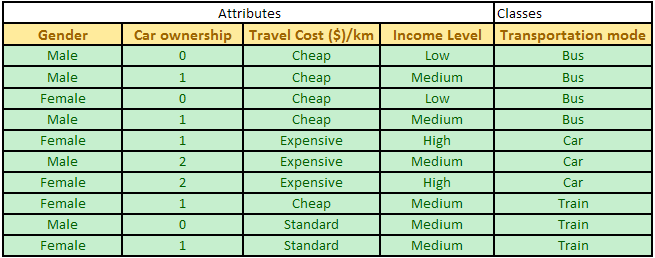

In our example, the classes of Transportation mode below consist of three groups of Bus, Car and Train.

Scikit-Learn  uses  the  Classification  And  Regression  Tree  (CART)  algorithm  to  train Decision Trees (also called “growing” trees). The idea is really quite simple: the algorithm first splits the training set in two subsets using a single feature *k* and a threshold *tk* e.g., "Travel Cost== Cheap".

If we make the fist split on the feature "Travel Cost== Cheap", 

In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv('datasets/transportation.csv')
df

,Gender,Car_ownership,Travel_cost,Income_level,Transporation_model
0,Male,0,Cheap,Low,Bus
1,Male,1,Cheap,Medium,Bus
2,Female,0,Cheap,Low,Bus
3,Male,1,Cheap,Medium,Bus
4,Female,1,Expensive,High,Car
5,Male,2,Expensive,Medium,Car
6,Female,2,Expensive,High,Car
7,Female,1,Cheap,Medium,Train
8,Male,0,Standard,Medium,Train
9,Female,1,Standard,Medium,Train


In [16]:
# the sub-dataset for the left node:
df_left = df[df['Travel_cost']== "Cheap"]
df_left

,Gender,Car_ownership,Travel_cost,Income_level,Transporation_model
0,Male,0,Cheap,Low,Bus
1,Male,1,Cheap,Medium,Bus
2,Female,0,Cheap,Low,Bus
3,Male,1,Cheap,Medium,Bus
7,Female,1,Cheap,Medium,Train


4 buses and 1 train. 
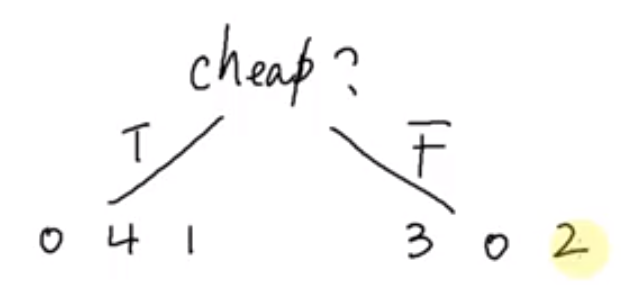


In [17]:
# Gini for the left node: 
1-(1/5)**2-(4/5)**2
#not a great split.

0.31999999999999984

In [18]:
# the sub-dataset for the right node:
df_right= df[df['Travel_cost']!= "Cheap"]
df_right

,Gender,Car_ownership,Travel_cost,Income_level,Transporation_model
4,Female,1,Expensive,High,Car
5,Male,2,Expensive,Medium,Car
6,Female,2,Expensive,High,Car
8,Male,0,Standard,Medium,Train
9,Female,1,Standard,Medium,Train


In [15]:
# Gini for the right node:
1-(2/5)**2-(3/5)**2


0.48

In [16]:
#weighted average of Ginis after this split.
0.31999999999999984*5/10 + 0.48*5/10
#weighted average for split: travel cost=CHEAP

0.3999999999999999

How does it choose **k** and *tk* ? 

It searches for the pair (**k**, *tk* ) that produces the purest subsets (weighted by their size). 

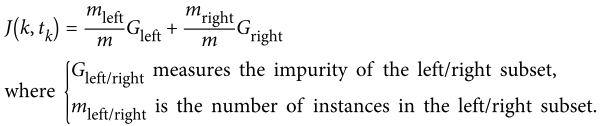

### Discuss: are we trying to get the maximum or the minimum of this function?

MINIMUM

## Exercise:
What will the weighted Gini if we do the "Car_ownership>0" as the first split when we build a decision tree?

Compared with "Travel Cost== Cheap", which is a better split?

In [21]:
# the sub-dataset for the left node:
df_cleft = df[df['Car_ownership']> 0]
df_cleft

,Gender,Car_ownership,Travel_cost,Income_level,Transporation_model
1,Male,1,Cheap,Medium,Bus
3,Male,1,Cheap,Medium,Bus
4,Female,1,Expensive,High,Car
5,Male,2,Expensive,Medium,Car
6,Female,2,Expensive,High,Car
7,Female,1,Cheap,Medium,Train
9,Female,1,Standard,Medium,Train


In [22]:
# Gini for the left node:
1-(3/7)**2-(2/7)**2-(2/7)**2

0.653061224489796

In [23]:
# the sub-dataset for the right node:
df_cright = df[df['Car_ownership']== 0]
df_cright

,Gender,Car_ownership,Travel_cost,Income_level,Transporation_model
0,Male,0,Cheap,Low,Bus
2,Female,0,Cheap,Low,Bus
8,Male,0,Standard,Medium,Train


In [24]:
# Gini for the right node:
1-(0/3)**2-(2/3)**2-(1/3)**2

0.4444444444444445

In [25]:
#weighted average of Ginis after this split.
0.653061224489796*(7/10)+0.4444444444444445*(3/10)

0.5904761904761905

A little bit better but not much. 

## Entropy
By default, the Gini impurity measure is used, but you can select the entropy impurity
measure instead by setting the  criterion  hyperparameter to  "entropy" . 

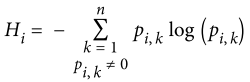

- P i,k is the ratio of class k instances among the training instances in the i th node.

The entropy for the green node in the decision tree for the iris dataset:


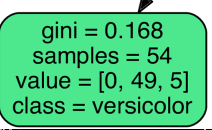

In [22]:
-(49/54)*np.log(49/54)-(5/54)*np.log(5/54)

0.30849545083110386

Range of entropy:

In [23]:
# best case is 0 because all samples belong to one class. 
-(54/54)*np.log(54/54)

-0.0

In [24]:
# worst case (two classes). Worst case 50/50 split, closer to 1. 
-(27/54)*np.log(27/54)-(27/54)*np.log(27/54)

0.69314718055994529

### Exercise:

We used weighted Gini to prove that "Travel Cost== Cheap" is a better split than "Car_ownership>0". If we use the Entropy instead of Gini, will we still come to the same conclusion?

Hint: we want to miniminze the weighted Entropy instead of weighted Gini in this case.

In [43]:
# Entropy for the  nodes:
TLN= -(1/5)*np.log(1/5)-(4/5)*np.log(4/5)
print('Travel left node', TLN)

TRN=-(2/5)*np.log(2/5)-(3/5)*np.log(3/5)
print('Travel right node', TRN)

TWeight_entropy=TLN*(5/10) + TRN*(5/10)
print('Travel Weighted Entropy',TWeight_entropy)

Travel left node 0.5004024235381879
Travel right node 0.6730116670092565
Travel Weighted Entropy 0.5867070452737222


In [33]:
# Entropy for the  nodes:
CLN= -(3/7)*np.log(3/7)-(2/7)*np.log(2/7)-(2/7)*np.log(2/7)
print('Car Left Node',CLN) #entropy higher than one! Possible in entropy. 

CRN=-(2/3)*np.log(2/3)-(1/3)*np.log(1/3)
print('Car Right Node',CRN)

CWeight_entropy=CLN*(7/10) + CRN*(3/10)
print('Car Weighted Entropy',CWeight_entropy)

Car Left Node 1.0789922078775833
Car Right Node 0.6365141682948128
Car Weighted Entropy 0.9462487960027521


In [ ]:
#YES, travel cost is better based off of entropy 

## Exercise: Create two tree models
Create two decision tree models, and specify the criterion to be 'gini' and 'entropy'.

Try to use those two trees to predict the same split of kyphosis data. Do you get the same (or very similar) results?


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
df = pd.read_csv('datasets/kyphosis.csv')
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [44]:
tree_clf = DecisionTreeClassifier(criterion='gini')
tree_clf.fit(X_train, y_train)
predictions = tree_clf.predict(X_test)

In [45]:
print('Gini confusion matrix')
print(confusion_matrix(y_test,predictions))

Gini confusion matrix
[[16  3]
 [ 4  2]]


In [46]:
en_tree_clf = DecisionTreeClassifier(criterion='entropy')
en_tree_clf.fit(X_train, y_train)
predictions = tree_clf.predict(X_test)

In [47]:
print('Entropy confusion matrix')
print(confusion_matrix(y_test,predictions))

Entropy confusion matrix
[[16  3]
 [ 4  2]]


# To sum up
- Gini impurity:
    - best case: 0  (all the sample of one node belong to the same class)
    - worst case: 1-1/n (a node of n samples, each of them belongs to a different class)
    - the range of Gini impurity is [0,1)
- CART Training Algorithm
    - tries to minimize the weighted Gini value for a split
    - it only looks one step further...
- Entropy:
    - best case: 0
- Entropy or Gini:
    - they usually produce very similar trees